<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Molecule (H₂O)**

[Water molecule](https://en.m.wikipedia.org/wiki/Water) (H₂O) has a bent (or V-shaped) molecular geometry

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/H2O_2D_labelled.svg/320px-H2O_2D_labelled.svg.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1822.png)

* **Ubiquitous Tracer of Warm, Dense Gas and Star Formation**: Water (H₂O) is a highly abundant and ubiquitous molecule in space, found in a wide range of astrophysical environments. Its rich spectrum of rotational transitions, particularly at microwave and infrared wavelengths, makes it an exceptional tracer of warm, dense molecular gas. In star-forming regions, H₂O emission is a powerful diagnostic for characterizing the kinematics, temperature, and density of gas in shocks, outflows, and the innermost envelopes of protostars, providing crucial insights into the star formation process.
* **Fundamental Role in Interstellar Chemistry and Ice Formation**: Water is a key component in the complex network of interstellar chemistry, participating in numerous gas-phase and grain-surface reactions. It is a major constituent of ice mantles on dust grains, acting as a reservoir for oxygen and hydrogen and playing a critical role in the chemical evolution of molecular clouds. Spectral observations of H₂O, including its solid-state features, provide direct evidence for its formation pathways, abundance variations, and its interaction with dust grains, helping us understand the evolution of interstellar matter.
* **Indicator of Habitable Environments and Exoplanet Atmospheres**: As the most essential molecule for life as we know it, the presence of water in various astrophysical settings is of paramount astrobiological interest. Spectral detection of H₂O in circumstellar disks, comets, and particularly in the atmospheres of exoplanets, can serve as a potential biosignature or an indicator of conditions favorable for habitability. Analyzing its spectral features helps constrain the water content, temperature, and atmospheric structure of these diverse environments.
* **Powerful Probe of Shocks, Outflows, and Energetic Processes**: Water molecules are readily excited by energetic processes such as shocks caused by stellar outflows, supernovae, or cloud-cloud collisions. The detection of highly excited rotational transitions of H₂O, including maser emission, serves as a sensitive probe of these dynamic and energetic phenomena. Spectral mapping of water reveals the morphology and kinematics of these outflows, providing insights into feedback mechanisms that regulate star formation and the dispersal of interstellar material.
* **Accessible Across a Wide Range of Wavelengths with Unique Isotopic Signatures**: Water's rotational and rovibrational transitions span a broad range of wavelengths, from microwave to infrared, making it observable with both ground-based (e.g., ALMA, IRAM) and space-based (e.g., Herschel, JWST) observatories. Furthermore, its isotopologues, such as HDO (deuterated water) and H₂¹⁸O, are valuable tracers for studying isotopic fractionation, providing clues about the physical conditions and chemical history of various astronomical objects, including the early Solar System and the interstellar medium.

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''

# Name
molecule = 'Water (H₂O)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # Water is a stable, closed-shell molecule. All electrons are paired in its ground state
# All valence electrons are paired (8 valence electrons total). Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [ ]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Water (H₂O) molecule symmetry:
 Top group: C2v
 Group name: C2v
--------------------


Point Group Symmetry
* **Shape:** Bent (V-shaped)
* **Symmetry Operations:** It has a $C_2$ rotation axis (through the oxygen atom, bisecting the H-O-H angle) and two vertical mirror planes ($\sigma_v$).
* **Point Group:** **$C_{2v}$**
* *Definitely not linear.*

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -76.0267936449739


np.float64(-76.02679364497389)

converged SCF energy = -76.0267936449739


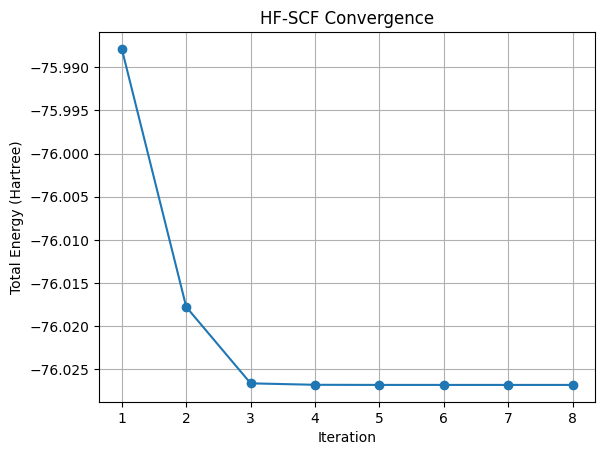

Ground state energy for Water (H₂O): -76.02679364497389 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -76.4203489203946


np.float64(-76.42034892039462)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -76.0267936449739
E(MP2) = -76.2307620085713  E_corr = -0.20396836359741
E(SCS-MP2) = -76.2269035845031  E_corr = -0.200109939529191
MP2 energy: -0.20396836359741016 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -76.026793644974
E(CCSD) = -76.24008590505713  E_corr = -0.2132922600831524
CCSD(T) correction = -0.00305623237486233


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -76.0267936449739
Excited State energies (eV)
[ 9.22143837 10.99767198 11.83503377]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B1      9.22144 eV    134.45 nm  f=0.0285
Excited State   2:   A2     10.99767 eV    112.74 nm  f=0.0000
Excited State   3:   A1     11.83503 eV    104.76 nm  f=0.1077


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-7351a484-7b40-4845-bbe7-a30f581f0dcc.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.757000   0.586000    0.000000  0.000000  0.000000
   H   0.000000  -0.757000   0.586000    0.000000  0.000000  0.000000
converged SCF energy = -76.0267936449761
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0143172712
1 H     0.0000000000     0.0100822079     0.0071586356
2 H     0.0000000000    -0.0100822079     0.0071586356
----------------------------------------------
cycle 1: E = -76.026793645  dE = -76.0268  norm(grad) = 0.0226004


Step    0 : Gradient = 1.305e-02/1.432e-02 (rms/max) Energy = -76.0267936450
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.60000e-01 5.60557e-01 5.60557e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.003321   -0.000000 -0.000000  0.003321
   H  -0.000000   0.746102   0.584339   -0.000000 -0.010898 -0.001661
   H   0.000000  -0.746102   0.584339    0.000000  0.010898 -0.001661
converged SCF energy = -76.0270469084288
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0000751802
1 H     0.0000000000    -0.0012666218     0.0000375901
2 H     0.0000000000     0.0012666218     0.0000375901
----------------------------------------------
cycle 2: E = -76.0270469084  dE = -0.000253263  norm(grad) = 0.00179364


Step    1 : Displace = 9.203e-03/1.102e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.036e-03/1.267e-03 (rms/max) E (change) = -76.0270469084 (-2.533e-04) Quality = 0.921
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.63125e-01 5.60557e-01 6.01182e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.005092   -0.000000 -0.000000  0.001771
   H  -0.000000   0.748968   0.583454   -0.000000  0.002865 -0.000885
   H   0.000000  -0.748968   0.583454    0.000000 -0.002865 -0.000885
converged SCF energy = -76.027053478192
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000     0.0000785354
1 H     0.0000000000     0.0000519276    -0.0000392677
2 H     0.0000000000    -0.0000519276    -0.0000392677
----------------------------------------------
cycle 3: E = -76.0270534782  dE = -6.56976e-06  norm(grad) = 0.000121015


Step    2 : Displace = 2.654e-03/2.999e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 6.987e-05/7.854e-05 (rms/max) E (change) = -76.0270534782 (-6.570e-06) Quality = 0.931
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.75073e-01 5.60557e-01 5.98116e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.004935   -0.000000 -0.000000 -0.000157
   H  -0.000000   0.748790   0.583533   -0.000000 -0.000177  0.000079
   H   0.000000  -0.748790   0.583533    0.000000  0.000177  0.000079
converged SCF energy = -76.0270535127392
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0000049469
1 H     0.0000000000     0.0000021121     0.0000024735
2 H     0.0000000000    -0.0000021121     0.0000024735
----------------------------------------------
cycle 4: E = -76.0270535127  dE = -3.45472e-08  norm(grad) = 6.75499e-06


Step    3 : Displace = 1.827e-04/1.941e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 3.900e-06/4.947e-06 (rms/max) E (change) = -76.0270535127 (-3.455e-08) Quality = 0.989
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.75073e-01 5.60557e-01 5.98116e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 1.605 seconds


[[ 0.          0.          0.00932501]
 [ 0.          1.41500863  1.102717  ]
 [ 0.         -1.41500863  1.102717  ]]


converged SCF energy = -76.0267936449739


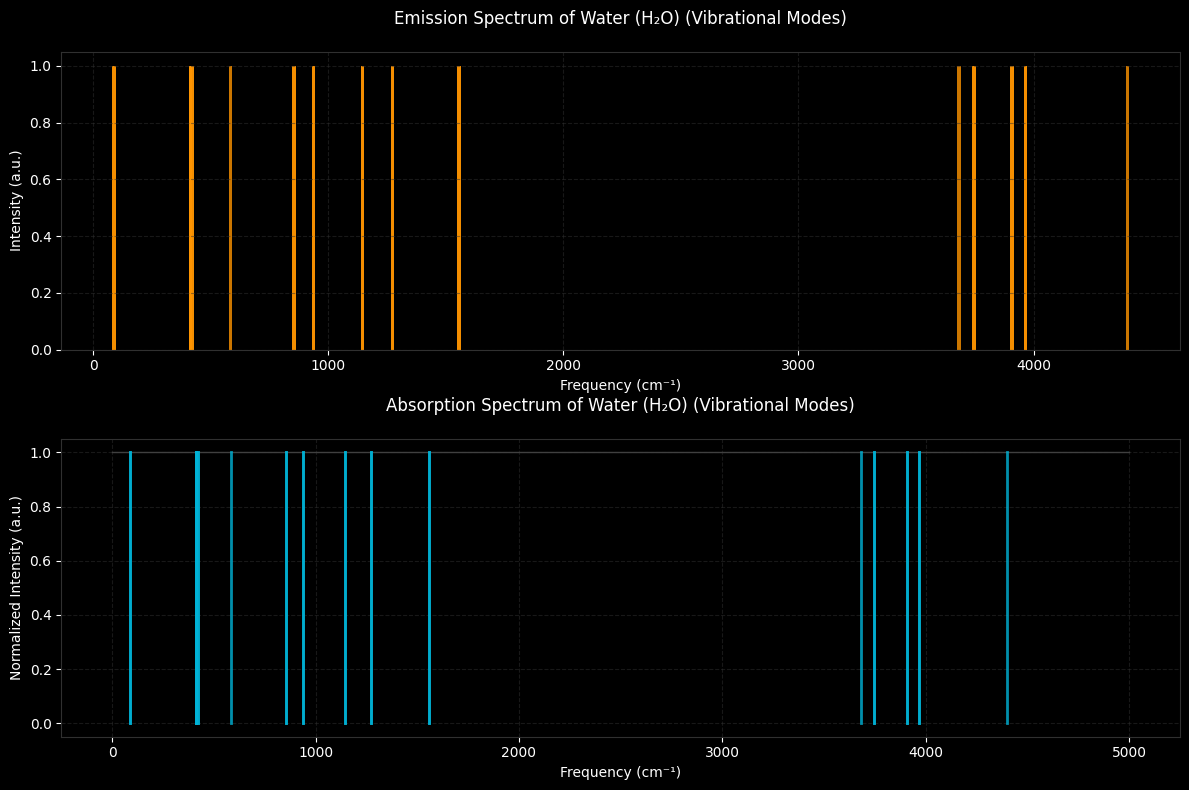

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()